Requires notebook 0.

In [6]:
suppressPackageStartupMessages({
  library(dplyr)
  library(dataorganizer)
  library(devtools)
  library(cellAdmix)

  devtools::load_all()
})

suppressMessages({
  load_arial_font()
})

ℹ Loading cellAdmixNotebooks


In [2]:
# load gut data
data <- prepare_gut_tx_and_meta()
df <- data[[2]]

df$fov <- 1
df$z_index <- dense_rank(df$z)-1 # need z_index for indexing the stain image. Code also assumes it's 0 indexed.
df <- df[,c('x','y','z_index','z','gene','cell','celltype','fov','mol_id')]
df$x <- df$x-1 # it's already correctly indexed to match image coords, but current code assumes 0 indexing
df$y <- df$y-1

In [3]:
score_params <- list(
  sep_type = "pairwise_max",
  compare_type = "cross_groups", # 'cross_groups' (i.e., admix-pure vs pure-pure) or 'same_groups' (i.e.,admix-admix vs pure-pure)
  norm_scores = FALSE, # to normalize each pair's membrane signal by distance between molecules
  same_z = TRUE,
  balance_dists = TRUE, # to balance molecule pair distance distributions between admix and native groups
  min_mols = 5, # require at least this many molecule pairs of each type admix/native to test a cell
  downsamp_cells_to = NULL, # downsample number of cells per fov to test
  downsamp_pairs_to = NULL # downsample number of molecule pairs per z slice to test if above this threshold
)

In [4]:
focal_cell_type <- 'Goblet'

df_markers <- load_markers_gut(filter_markers=FALSE)
colnames(df_markers) <- c('gene','ct')
df_markers$is_admixture <- df_markers$ct != focal_cell_type

ndx_match <- match(df$gene,df_markers$gene)
df$is_admixture <- df_markers[ndx_match,'is_admixture']
df <- df[!is.na(df$is_admixture),]

In [7]:
scores <- get_scores_all_fov(df,score_params,load_images_gut,ct_test=focal_cell_type,n.cores=10)

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
[1] 23
[1] 24
[1] 25
[1] 26
[1] 27
[1] 28
[1] 29
[1] 30
[1] 31
[1] 32
[1] 33
[1] 34
[1] 35
[1] 36
[1] 37
[1] 38
[1] 39
[1] 40
[1] 41
[1] 42
[1] 43
[1] 44
[1] 45
[1] 46
[1] 47
[1] 48
[1] 49
[1] 50
[1] 51
[1] 52
[1] 53
[1] 54
[1] 55
[1] 56
[1] 57
[1] 58
[1] 59
[1] 60
[1] 61
[1] 62
[1] 63
[1] 64
[1] 65
[1] 66
[1] 67
[1] 68
[1] 69
[1] 70
[1] 71
[1] 72
[1] 73
[1] 74
[1] 75
[1] 76
[1] 77
[1] 78
[1] 79
[1] 80
[1] 81
[1] 82
[1] 83
[1] 84
[1] 85
[1] 86
[1] 87
[1] 88
[1] 89
[1] 90
[1] 91
[1] 92
[1] 93
[1] 94
[1] 95
[1] 96
[1] 97
[1] 98
[1] 99
[1] 100
[1] 101
[1] 102
[1] 103
[1] 104
[1] 105
[1] 106
[1] 107
[1] 108
[1] 109
[1] 110
[1] 111
[1] 112
[1] 113
[1] 114
[1] 115
[1] 116
[1] 117
[1] 118
[1] 119
[1] 120
[1] 121
[1] 122
[1] 123
[1] 124
[1] 125
[1] 126
[1] 127
[1] 128
[1] 129
[1] 130
[1] 131
[1] 132
[1] 133
[1] 134
[1] 135
[1] 136
[1] 137
[1] 138
[1] 

In [8]:
print(t.test(log(scores), mu = 0, alternative = "greater"))
sum(scores>1)/length(scores)
sum(scores<1)/length(scores)


	One Sample t-test

data:  log(scores)
t = 13.839, df = 302, p-value < 2.2e-16
alternative hypothesis: true mean is greater than 0
95 percent confidence interval:
 0.08496658        Inf
sample estimates:
 mean of x 
0.09646724 



[1] 0.7788779

[1] 0.1254125

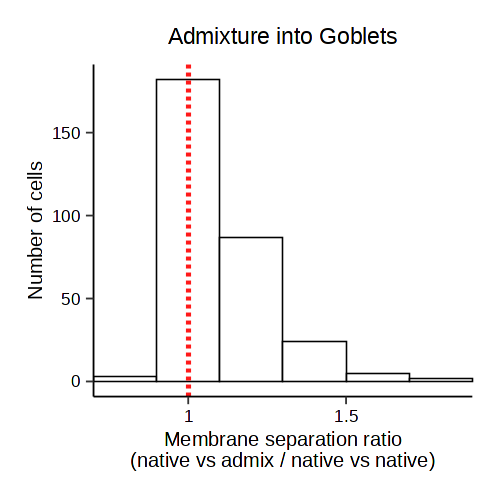

In [9]:
options(repr.plot.width = 2.5, repr.plot.height = 2.5, repr.plot.res = 200)

p <- plot_scores(scores,title='Admixture into Goblets',score_params,
                 log_transform=FALSE,binwidth=.2,capval=3)
p

In [10]:
pdf(OutputPath("gut_membrane_sep.pdf"), useDingbats=FALSE, width=1.85, height=1.85)
p
dev.off()

png 
  2